PCA的步骤：
    １、对数据进行归一化处理
    ２、计算归一化后的数据集的协方差矩阵
    ３、计算协方差矩阵的特征值和特征向量
    ４、保留最重要的ｋ个特征
    5、找出ｋ个特征对应的特征向量
    6、将m * n的数据集乘以k个n维的特征向量(n * k),最后得到降维数据
实质就是对角化方差矩阵
对一个n∗n的对称矩阵进行分解，我们可以求出它的特征值和特征向量，就会产生n个n维的正交基，每个正交基会对应一个特征值。然后把矩阵投影到这n个基上，此时特征值的模就表示矩阵在该基的投影长度。
特征值越大，说明矩阵（样本）在对应的特征向量上投影后的方差越大，样本点越离散，越容易区分，信息量也就越多

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def meanX(dataX):
    #axis=0表示按列来求均值
    return np.mean(dataX, axis=0)

In [3]:
"""
参数：
	- XMat：传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
	- k：表示取前k个特征值对应的特征向量
返回值：
	- finalData：参数一指的是返回的低维矩阵，对应于输入参数二
	- reconData：参数二对应的是移动坐标轴后的矩阵
"""
def pca(XMat, k):
    average = meanX(XMat)
    #shape()函数是查看矩阵的维度
    m, n = np.shape(XMat)
    data_adjust = []
    #tile()函数就是将原矩阵横向、纵向地复制,下面的含义是将average矩阵纵向复制m个
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T) #计算协方差矩阵
    featValue, featVec = np.linalg.eig(covX) #求解协方差矩阵的特征值和特征向量
    index = np.argsort(-featValue) #按照特征值从大到小排序
    finalData = []
    if k > n:
        print("k must lower than feature number")
        return 
    else:
        selectVec = np.matrix(featVec.T[index[:k]]) #特征向量是列向量,需要转置
        finalData = data_adjust * selectVec.T
        reconData = (finalData * selectVec) + average
    return finalData, reconData

In [8]:
def loaddata(datafile):
    return np.array(pd.read_csv(datafile, sep='\t', header=None)).astype(float)

In [12]:
def plotBestFit(data1, data2):
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)
    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[i,0])
        axis_y2.append(dataArr2[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=45, c='blue', marker='s')
    ax.scatter(axis_x2, axis_y2, s=45, c='red')
    plt.xlabel('x1');plt.ylabel('x2');
    plt.savefig('out.png')
    plt.show()

In [6]:
def main():
    datafile = 'data.txt'
    XMat = loaddata(datafile)
    k = 2
    return pca(XMat, k)

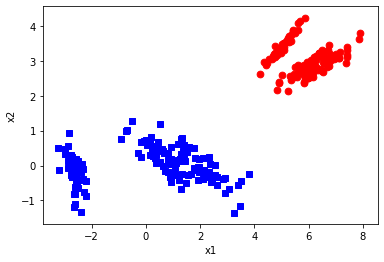

In [13]:
if __name__ == "__main__":
    finalData, reconMat = main()
    plotBestFit(finalData, reconMat)